FACE DETECTION


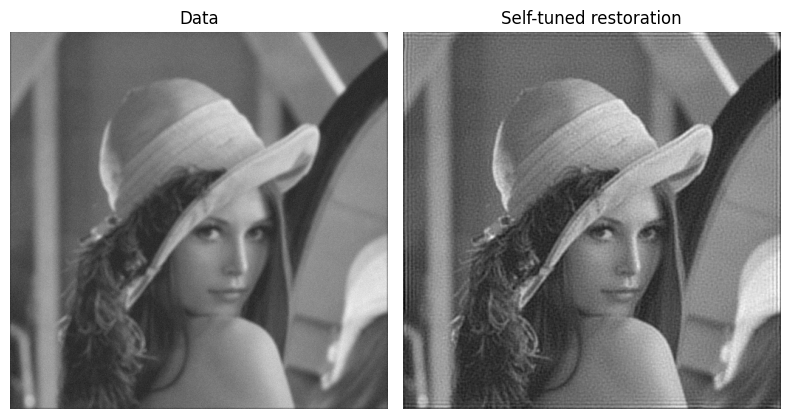

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io, restoration
from scipy.signal import convolve2d as conv2

rng = np.random.default_rng()

# Load your own grayscale image (my_image.png)
my_image = io.imread('/content/lena512.jpg')

# Assuming the image is already grayscale, skip the rgb2gray conversion
astro = my_image

# Ensure that astro is a 2D array
if astro.ndim == 3:
    astro = color.rgb2gray(astro)

# Convert the PSF to a 2D array if needed
psf = np.atleast_2d(np.ones((5, 5)) / 25)

# Ensure both astro and psf are 2D arrays
astro = np.atleast_2d(astro)

# Perform convolution
astro = conv2(astro, psf, 'same')
astro += 0.1 * astro.std() * rng.standard_normal(astro.shape)

deconvolved, _ = restoration.unsupervised_wiener(astro, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0].imshow(astro, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved)
ax[1].axis('off')
ax[1].set_title('Self-tuned restoration')

fig.tight_layout()

plt.show()


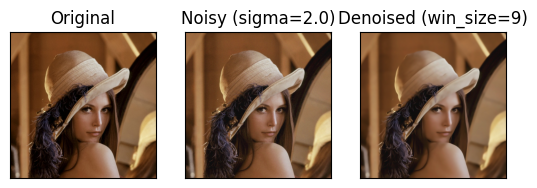

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/lena512.jpg')

mean = 0
variance = 10
sigma = np.sqrt(variance)
noise = np.random.normal(mean, sigma, img.shape)
noisy_img = img + noise

noisy_img = cv2.normalize(noisy_img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC3)

window_sizes = [3, 5, 7, 9]
noise_levels = [0.4, 0.8, 2]

for win_size in window_sizes:
    for noise_level in noise_levels:
        denoised_img = cv2.fastNlMeansDenoisingColored(noisy_img, None, h=10, templateWindowSize=win_size, searchWindowSize=win_size)

        # Save the noisy images
        noisy_img_filename = f'noisy_image_sigma_{noise_level}_win_{win_size}.jpg'
        cv2.imwrite(noisy_img_filename, noisy_img)

plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(cv2.cvtColor(noisy_img, cv2.COLOR_BGR2RGB)), plt.title('Noisy (sigma={:.1f})'.format(noise_level))
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB)), plt.title('Denoised (win_size={})'.format(win_size))
plt.xticks([]), plt.yticks([])
plt.show()


Enter 'image' to detect faces in an image, or 'video' to detect faces in a video: image
Enter the path to the image file: /content/noisy_image_sigma_2_win_3.jpg


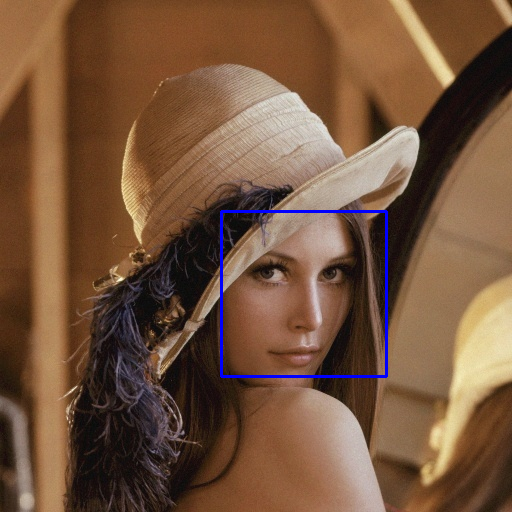

In [4]:
import cv2
from google.colab.patches import cv2_imshow

# Load the Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Function to perform face detection on an image
def detect_faces_in_image(image_path):
    img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    cv2_imshow(img)

# Function to perform face detection on a video
def detect_faces_in_video(video_path):
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        cv2_imshow(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()

# Choose whether to detect faces in an image or a video
while True:
    choice = input("Enter 'image' to detect faces in an image, or 'video' to detect faces in a video: ")

    if choice.lower() == 'image':
        image_path = input("Enter the path to the image file: ")
        detect_faces_in_image(image_path)
        break
    elif choice.lower() == 'video':
        video_path = input("Enter the path to the video file: ")
        detect_faces_in_video(video_path)
        break
    else:
        print("Invalid choice. Please enter 'image' or 'video'.")
